# The Full Pipeline for Exploiting Loop-Like Exercices in The Classification of Parkinson's Disease

## Content

1. Data Preparation
    1. Data Collection
    2. Preprocessing
    3. Splitting
1. Exploratory Data Analysis
    1. Basic Statistical Measures
    2. Plotting
1. Data Manipulation
    1. Feature Extraction
    2. Normalization
1. Model Architecture Design
1. Model Compilation
1. Model Training
1. Model Tuning and Evaluation

## 1. Data Preparation

### A. Data Collection

<p>In this phase, the data is loaded from the files that were created by the data collection system.</p>
<p>This is done using packages and modules specifically designed for the hierarchical structure of this data.</p>
<p>The module responsible for data collection also performs some basic preprocessing tasks, such as removing invalid data that shouldn't exist (e.g. letters in numeric values).</p>
<p>The data concerning the cursive <em>"L"</em> task in the French language is loaded.</p>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
from dataaccess.filedatareader import FileDataReader

reader = FileDataReader('../data/Patients Records 05_04_2019')
info, data = reader.load_french(tasks=[3])

Loading the data, please wait.
Data loaded successfully.


Here is how the 'info' dataframe looks like: 

In [2]:
info

,Age,Birth Date,Gender,Hand,Vision Problems,Vision Problem Comment,Arthrosis Problem,Arthrosis Problem Comment,Other Comments,Native Language,Bilingualism Type,French Level Oral,French Level Read,French Level Written,Arabe Level Oral,Arabe Level Read,Arabe Level Written,Alphabets,Civil State,Number of Children,Socio Educative Level,Writing Frequency,Principal Profession,Last Profession,Retired,...,Lower Limbs Surgery,Upper Limbs Surgery,Lower Limbs Pain,Upper Limbs Pain,Surgery (M12),Surgery Detail (M12),Hospitalization (M12),Hospitalization Detail (M12),Appearance of a Pathology (M12),Appearance of a Pathology Details (M12),New Diagnostic (M12),New Diagnostic Details (M12),New Treatment,New Treatment (M12),Important Change in Alcohol Consumption (M12),Important Change in Alcohol Consumption Details (M12),Important Change in Emotional State (M12),Other Important Details (M12),Lastname,Firstname,Level of Studies,The Person Writes,Mother Toungue,French Level,Pathology
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EL IDRISSI NOUZHA,59,1/1/1958,Female,Right,No,None,No,None,None,Arab,Yes_late,Advanced,Advanced,Advanced,Advanced,Advanced,Advanced,Latin Arab,Married,2,NC6_BAC,"Everyday, several times a day",Teacher,Teacher,Yes,...,No,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JIDAR ABBES,63,NaN,Male,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin Arab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jidar,Abbes,Higher education,6-7 times per week,Amharic,Advanced,None
BAAZI LATIFA,37,NaN,Female,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin Arab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baazi,Latifa,HighSchool,Everyday - Many times per day,Amharic,Medium,None
AFERANE ELHASSANE,56,NaN,Male,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin Arab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aferane,Elhassane,Higher education,6-7 times per week,Amharic,Advanced,None
NEZHA TOUGHAT,57,1/1/1961,Female,Right,No,None,No,None,None,Arab,No,None,None,None,Elementary,Elementary,Elementary,Arab,Married,2,NC2_Reads_Writes_Counts,Less than once a week,Labourer,Labourer,Yes,...,No,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TALBIOUI RAJAA,30,NaN,Female,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin Arab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talbioui,Rajaa,Higher education,Everyday - Many times per day,Amharic,Advanced,None
AYOUB NEDBOUR,23,13/2/1993,Male,Right,No,None,No,None,None,Arab,Yes_early,Advanced,Advanced,Advanced,Advanced,Advanced,Advanced,Latin Arab,Single,0,NC7_University_Diploma,"Everyday, several times a day",Student,Student,No,...,No,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEHDAOUI MOHAMED,69,1/1/1948,Male,Right,No,None,No,None,None,Arab,No,Missing,Missing,Missing,Elementary,Elementary,Elementary,Arab,Married,5,NC2_Reads_Writes_Counts,Less than once a week,Labourer,Labourer,Yes,...,No,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And then the 'data' dataframe:

In [3]:
df = data.copy()
df = df.reset_index()
df = df.set_index(["ID", 'Language', 'Task', 'Time']).sort_index()
df

X      Y  P    Az   Al
ID            Language Task Time                            
ABABOU SALMA  French   3    0      6605  30983  0  1800  890
                            8      6566  31243  0  1800  890
                            15     6523  31370  0  1800  890
                            23     6479  31486  0  1800  890
                            30     6429  31580  0  1800  890
...                                 ...    ... ..   ...  ...
ZYATE TAOUFIK French   3    9940  20862  39678  0  1350  620
                            9948  20862  39678  0  1350  620
                            9955  20862  39678  0  1350  620
                            9963  20862  39678  0  1350  620
                            9970  20862  39678  0  1350  620

[294440 rows x 5 columns]

### B. Preprocessing

In the preprocessing phase, the following steps are carried:

- Handling missing data.
- Keeping only the data of healthy controls (HCs) and parkinson's disease patients (PDs).
- Count, age and gender matching between HCs and PD.

In our case, since there are no missing values in the data concerning Task 3 in French anyways, missing data is already handled.

Any exercice that doesn't correspond to an HC or a PD is removed (e.g. Alzheimers...).

HCs and PDs are matched in number, age and gender distrobution.

In [4]:
from datamanipulation.datageneration import get_pd_hc_only, match_age_gender_pd
info, data = get_pd_hc_only(info, data)
info, data = match_age_gender_pd(info, data)

### C. Splitting

In the splitting phase, I divide the dataset into training and test sets. The training set is used to train the model, and the test set (which is 30% of the data) evaluates the final model's performance, the test set is stratified to resemble the original data's label distrobution and gender distrobution across labels, in the train and test sets.

Since the data size is limiting, no validation set was left out, instead, 3-fold cross validation is used later.

In the following phases, only the training data is used.

In [5]:
from datamanipulation.datageneration import stratified_train_test_split

info_train, info_test, data_train, data_test = stratified_train_test_split(info, data, 'PD')

## 2. Exploratory Data Analysis

### A. Basic Statistical Measures

The full sample contains 20 PDs and 20 gender matched HCs, both groups are aged between 42 and 75.

In [6]:
df = info.groupby(['PD', 'Gender']).count()[["Hand"]]
df.columns = ['Count']
df

Count
PD Gender       
0  Female      6
   Male       14
1  Female      6
   Male       14

The training sample is also label, age and gender matched but with 15 PDs and 15 HCs:

In [7]:
df = info_train.groupby(['PD', 'Gender']).count()[["Hand"]]
df.columns = ['Count']
df

Count
PD Gender       
0  Female      4
   Male       11
1  Female      4
   Male       11

Another remark, is that the data is supposed to be spaced equaly in time (7ms and 8ms only), but there are a lot of images that contain data points that change eratically in time as follows, which is probably due to the pen leaving the tablet signal range:

In [8]:
hcs = data_train[data_train['PD']==0]
pds = data_train[data_train['PD']==1]

print('Example of non consistent time changes in a random image: ', list(pds.loc[pds.index.unique()[0]]['Time'].diff().where(lambda x: x > 8).dropna()))

Example of non consistent time changes in a random image:  [892.0, 944.0, 1028.0]


In [9]:
def calc_variable_time_change(df):
    count = 0
    for ix in df.index.unique():
        if len(df.loc[ix]['Time'].diff().unique()) > 3:
            count += 1
    return '{:.2f}'.format((count / df.index.unique().shape[0]) * 100) + "%"

print('The percentage of images that contain a variable time change:')
print('PDs:', calc_variable_time_change(pds))
print('HCs:', calc_variable_time_change(hcs))
print('All:', calc_variable_time_change(data_train))
print()

def calc_variable_time_change2(df):
    count = 0
    for ix in df.index.unique():
        count += df.loc[ix]['Time'].diff().where(lambda x: x > 8).dropna().shape[0]
    return '{:.2f}'.format((count / df.shape[0]) * 100) + "%"

print('The percentage of data points that contain a variable time change:')
print('PDs:', calc_variable_time_change2(pds))
print('HCs:', calc_variable_time_change2(hcs))
print('All:', calc_variable_time_change2(data_train))

The percentage of images that contain a variable time change:
PDs: 53.33%
HCs: 80.00%
All: 66.67%

The percentage of data points that contain a variable time change:
PDs: 0.09%
HCs: 0.19%
All: 0.13%


<p>Now let's compare some basic statistical measures between PDs and HCs.</p>
<p>Starting with HCs:</p>

In [10]:
hcs.describe()

,PD,Time,X,Y,P,Az,Al
count,21990.0,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000
mean,0.0,6783.841246,10681.097362,34799.010869,361.860027,1431.819918,544.097317
std,0.0,4705.546423,6249.243011,4188.478545,278.311940,344.487984,131.820293
min,0.0,0.000000,289.000000,25219.000000,0.000000,0.000000,220.000000
25%,0.0,2915.250000,4531.250000,30986.000000,0.000000,1280.000000,480.000000
50%,0.0,6013.000000,11652.500000,34245.500000,408.000000,1380.000000,530.000000
75%,0.0,9962.000000,16293.000000,38989.750000,574.750000,1550.000000,580.000000
max,0.0,20723.000000,28173.000000,40629.000000,1023.000000,3420.000000,900.000000


Then PD patients:

In [11]:
pds.describe()

,PD,Time,X,Y,P,Az,Al
count,42501.0,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000
mean,1.0,13492.175949,10002.918943,34771.385003,330.816193,1461.586551,527.321240
std,0.0,9661.151164,6294.360427,3918.256305,272.679820,373.010194,138.508536
min,1.0,0.000000,9.000000,27782.000000,0.000000,0.000000,220.000000
25%,1.0,5750.000000,4269.000000,31303.000000,0.000000,1280.000000,440.000000
50%,1.0,11613.000000,6860.000000,32515.000000,344.000000,1450.000000,510.000000
75%,1.0,20097.000000,16126.000000,38913.000000,569.000000,1630.000000,580.000000
max,1.0,43269.000000,37611.000000,40629.000000,1023.000000,3460.000000,900.000000


- The most important distinction when it comes to time, is that the mean task execution time is higher in PD patients than in HCs by 98%, the first quartile in time by 97%, the median of time by 93% and the third quartile by 101%. Which indicates that generally PD patients take around double the time span to complete the exercice than HCs. 
- Slightly smaller movements are also noticed in PD patients’ handwriting manifested in the mean, first quartile, median and third quartile of the x-axis by 7%,  6%, 69% and 1% respectively. 
- The pressure is also less in PD patients than in HCs handwriting manifested in the mean, median and third quartile by 9%, 18% and 1% respectively. 
- When it comes to altitude HCs seem to hold the pen a little bit straighter than PD patients in average by 3%. 

The Pearson's correlation matrix for all participants:

In [12]:
data_train.corr(numeric_only=True)

,PD,Time,X,Y,P,Az,Al
PD,1.000000,0.357389,-0.051133,-0.003264,-0.053512,0.038786,-0.058262
Time,0.357389,1.000000,0.322594,0.569053,0.009281,0.037580,-0.168064
X,-0.051133,0.322594,1.000000,0.072040,0.033914,-0.041263,0.026675
Y,-0.003264,0.569053,0.072040,1.000000,-0.056491,-0.085804,-0.262830
P,-0.053512,0.009281,0.033914,-0.056491,1.000000,-0.058666,-0.128959
Az,0.038786,0.037580,-0.041263,-0.085804,-0.058666,1.000000,0.136818
Al,-0.058262,-0.168064,0.026675,-0.262830,-0.128959,0.136818,1.000000


- There doesn't seem to be any strong correlation between any of the features, except for the time's correlation with X and Y which is normal considering the direction of writing.

### B. Plotting

First let's view the handwriting differences:

In [13]:
import numpy as np

def rand_imgs(num):
    rand_hcs = []
    rand_pds = []
    for i in range(num):
        rand_hcs.append(np.random.randint(0, len(hcs.index.unique())))
        rand_pds.append(np.random.randint(0, len(pds.index.unique())))
    hc_images = []
    pd_images = []
    for i, j in zip(rand_hcs, rand_pds):
        hc_images.append(hcs.loc[hcs.index.unique()[i]])
        pd_images.append(pds.loc[pds.index.unique()[j]])
    return hc_images, pd_images

rand_hcs, rand_pds = rand_imgs(3)

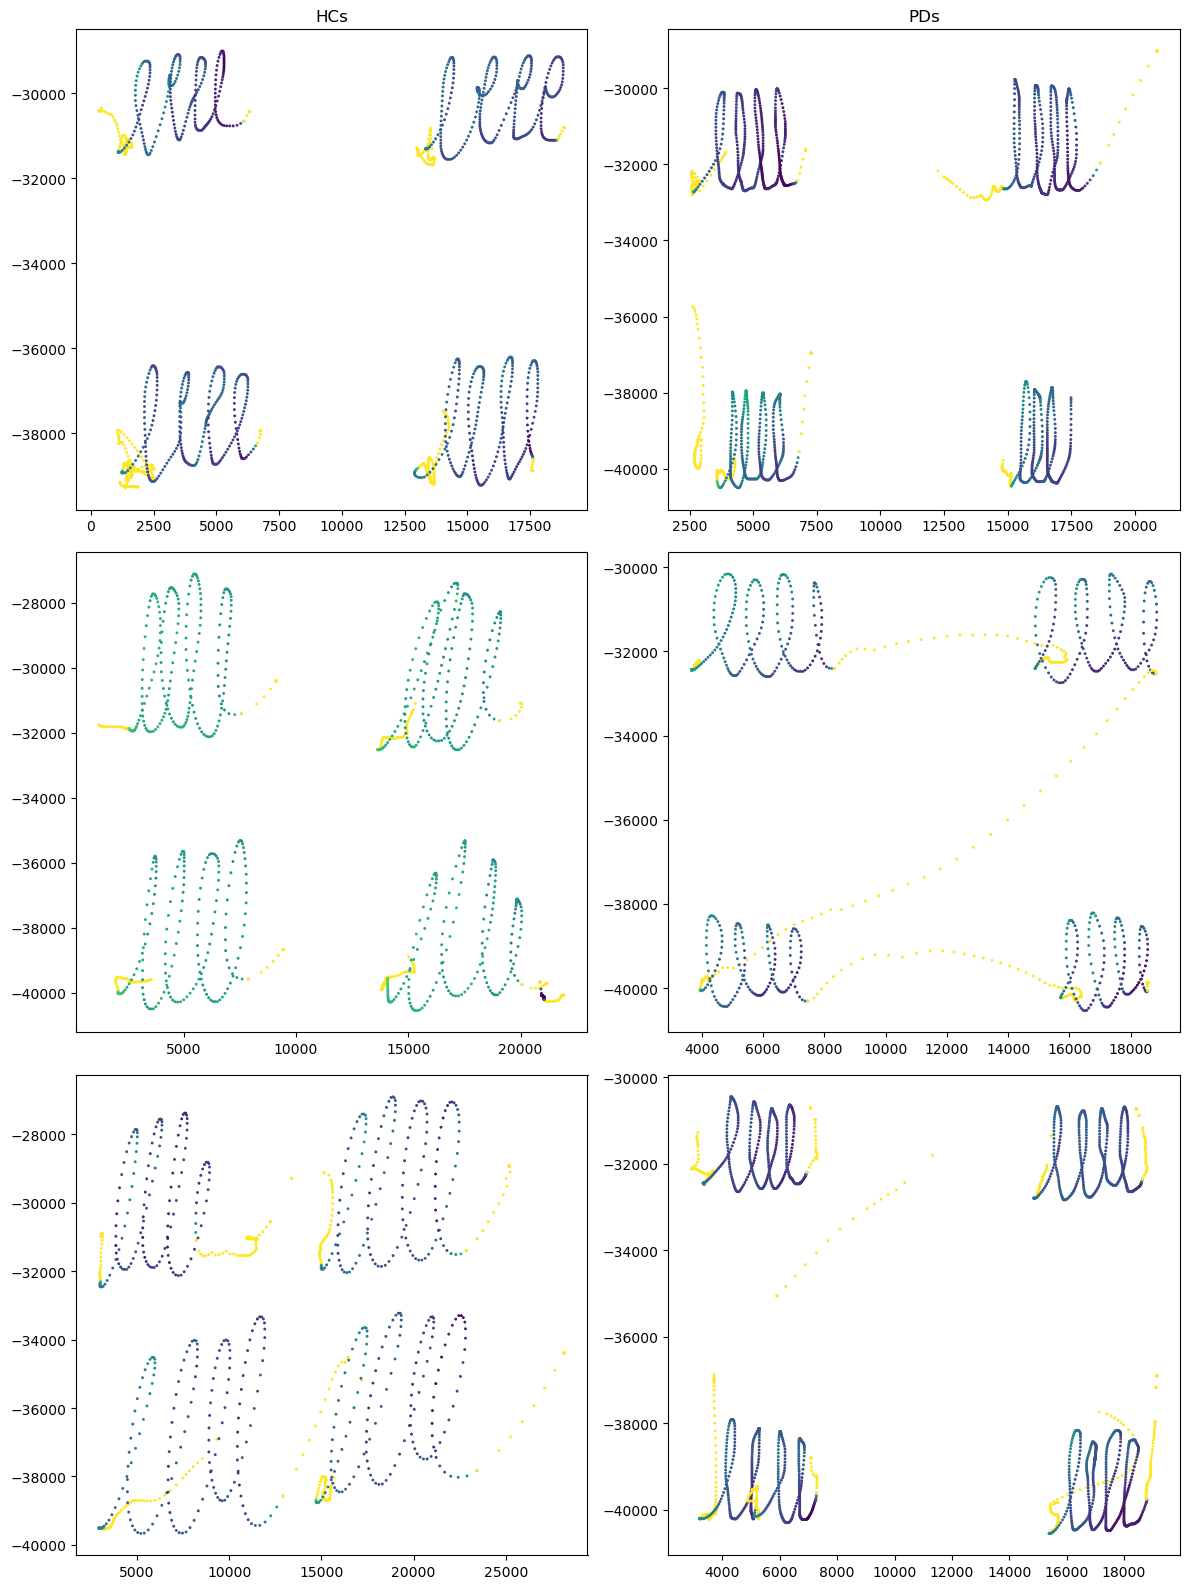

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 16))

hc_plot1 = plt.subplot2grid((3, 2), (0, 0))
hc_plot2 = plt.subplot2grid((3, 2), (1, 0))
hc_plot3 = plt.subplot2grid((3, 2), (2, 0))

pd_plot1 = plt.subplot2grid((3, 2), (0, 1))
pd_plot2 = plt.subplot2grid((3, 2), (1, 1))
pd_plot3 = plt.subplot2grid((3, 2), (2, 1))

hc_plot1.set_title('HCs')
hc_plot1.scatter(rand_hcs[0]['X'], rand_hcs[0]['Y'] *-1, c=rand_hcs[0]['P']*-1, s=1.2)
hc_plot2.scatter(rand_hcs[1]['X'], rand_hcs[1]['Y'] *-1, c=rand_hcs[1]['P']*-1, s=1.2)
hc_plot3.scatter(rand_hcs[2]['X'], rand_hcs[2]['Y'] *-1, c=rand_hcs[2]['P']*-1, s=1.2)

pd_plot1.set_title('PDs')
pd_plot1.scatter(rand_pds[0]['X'], rand_pds[0]['Y'] *-1, c=rand_pds[0]['P']*-1, s=1.2)
pd_plot2.scatter(rand_pds[1]['X'], rand_pds[1]['Y'] *-1, c=rand_pds[1]['P']*-1, s=1.2)
pd_plot3.scatter(rand_pds[2]['X'], rand_pds[2]['Y'] *-1, c=rand_pds[2]['P']*-1, s=1.2)

plt.tight_layout()
plt.show()

- It's very clear that HCs’ handwriting and in-air movements are far smoother than that of the PD, especialy observed in the x-axis.
- There is also a slight discrease in pressure in PD patients’ handwriting as time goes on, pressure is illustrated by color, the bluer the color the higher the pressure, the yellower the color the lower the pressure. 
- There is also noticeable micrographia in the x and y axes in PD patients’ handwriting.
- HCs handwriting seems to be much more rounded, while PD patients handwriting generally looks more straight up and down.
- A higher density of points in also noticeable in PD patients’ handwriting, which indicates slower movement and more time spent in HW (since the difference in time between each data point in handwriting is constant (8 ms)). 

## 3. Data Manipulation

### A. Feature Extraction

In this phase, we perform feature extraction and produce features that may be of value, as discovered in the exploratory data analysis.

Since the data is represented as images, only the features that can have a value at each datapoint are used, so features that produce vectors of smaller size than the number of data points per image, or features that produce one scalar value per image, are ignored.

The following are the extracted features:

1. Displacement in x and y.
1. Distance in x, y and both.
1. Velocity in x, y and both.
1. Acceleration in x, y and both.
1. Jerk in x, y and both.
1. Rate of change (ROC) in pressure.
1. ROC in Alt.
1. ROC in Az.
1. The slope (ROC of y over x).

In [15]:
from datamanipulation.extraction import *

extracted_train = extract_features(data_train)

Started extracting features.
The following features were extracted successfully: ['Displacement x', 'Displacement y', 'Distance x', 'Distance y', 'Distance x-y', 'Velocity x', 'Velocity y', 'Velocity x-y', 'Acceleration x', 'Acceleration y', 'Acceleration x-y', 'Jerk x', 'Jerk y', 'Jerk x-y', 'ROC p / time', 'ROC al / time', 'ROC az / time', 'Slope', 'Slant']
Number of features: 19


Let's explore the new features and compare between PDs and HCs, starting with PDs:

In [16]:
extracted_train[extracted_train['PD']==1].describe()

,PD,Time,X,Y,P,Az,Al,Displacement x,Displacement y,Distance x,Distance y,Distance x-y,Velocity x,Velocity y,Velocity x-y,Acceleration x,Acceleration y,Acceleration x-y,Jerk x,Jerk y,Jerk x-y,ROC p / time,ROC al / time,ROC az / time,Slope,Slant
count,42501.0,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000
mean,1.0,13492.175949,10002.918943,34771.385003,330.816193,1461.586551,527.321240,7.157079,13.229195,34.884803,50.560128,70.300675,1.007439,0.230435,7.626587,0.004149,-0.000609,0.005428,0.002398,0.000104,0.001579,-0.002936,-0.005459,0.127322,0.275495,-11.933623
std,0.0,9661.151164,6294.360427,3918.256305,272.679820,373.010194,138.508536,317.594415,613.462834,315.753796,611.518828,687.376753,33.555877,13.457288,36.659681,6.398433,2.121835,6.838602,1.567865,0.500443,1.597587,2.620058,1.210463,19.570091,34.094830,58.102633
min,1.0,0.000000,9.000000,27782.000000,0.000000,0.000000,220.000000,-18787.000000,-7139.000000,0.000000,0.000000,0.000000,-2196.285714,-508.750000,0.000000,-313.755102,-120.857143,-290.809906,-69.233236,-32.372449,-78.353100,-67.571429,-40.000000,-488.571429,-261.000000,-90.000000
25%,1.0,5750.000000,4269.000000,31303.000000,0.000000,1280.000000,440.000000,-9.000000,-23.000000,2.000000,5.000000,13.892444,-1.142857,-3.000000,1.829464,-0.044643,-0.078125,-0.091543,-0.009885,-0.018933,-0.022022,-0.250000,0.000000,0.000000,-2.080000,-64.323184
50%,1.0,11613.000000,6860.000000,32515.000000,344.000000,1450.000000,510.000000,0.000000,0.000000,12.000000,24.000000,34.132096,0.000000,0.000000,4.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000638,0.000000,0.000000,0.000000,-0.235023,-13.225802
75%,1.0,20097.000000,16126.000000,38913.000000,569.000000,1630.000000,580.000000,15.000000,25.000000,30.000000,54.000000,66.287254,2.125000,3.285714,8.830605,0.046875,0.075893,0.098291,0.010614,0.019133,0.026207,0.500000,0.000000,0.000000,0.600000,30.963757
max,1.0,43269.000000,37611.000000,40629.000000,1023.000000,3460.000000,900.000000,15184.000000,34635.000000,18787.000000,34635.000000,36709.845900,1696.857143,846.000000,2352.104247,271.895089,120.265306,336.014892,73.206274,19.796921,48.002127,54.428571,37.500000,475.714286,160.000000,90.000000


Then HCs:

In [17]:
extracted_train[extracted_train['PD']==0].describe()

,PD,Time,X,Y,P,Az,Al,Displacement x,Displacement y,Distance x,Distance y,Distance x-y,Velocity x,Velocity y,Velocity x-y,Acceleration x,Acceleration y,Acceleration x-y,Jerk x,Jerk y,Jerk x-y,ROC p / time,ROC al / time,ROC az / time,Slope,Slant
count,21990.0,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000
mean,0.0,6783.841246,10681.097362,34799.010869,361.860027,1431.819918,544.097317,13.396226,26.385493,64.557208,95.875443,131.396294,2.012189,0.644121,14.223164,0.055152,-0.000050,0.015130,0.011472,0.000367,0.005174,-0.018149,-0.026107,0.042481,-1.391357,-13.975286
std,0.0,4705.546423,6249.243011,4188.478545,278.311940,344.487984,131.820293,462.934851,846.099726,458.606935,841.063882,955.930617,44.346447,27.339278,58.107775,8.971658,4.392682,10.719522,2.258566,1.024832,2.499424,3.643026,1.651859,18.110038,35.820901,55.449778
min,0.0,0.000000,289.000000,25219.000000,0.000000,0.000000,220.000000,-19380.000000,-1829.000000,0.000000,0.000000,0.000000,-2078.625000,-180.571429,0.000000,-269.632653,-168.673469,-324.292340,-56.131059,-48.466472,-90.848627,-99.571429,-33.750000,-488.571429,-357.000000,-90.000000
25%,0.0,2915.250000,4531.250000,30986.000000,0.000000,1280.000000,480.000000,-15.000000,-40.000000,7.000000,7.000000,25.079872,-2.000000,-5.285714,3.358757,-0.087054,-0.156250,-0.160714,-0.019412,-0.032434,-0.037041,-0.428571,0.000000,0.000000,-2.000000,-63.434949
50%,0.0,6013.000000,11652.500000,34245.500000,408.000000,1380.000000,530.000000,0.000000,0.000000,25.000000,40.000000,59.426424,0.000000,0.000000,7.903758,0.000000,0.000000,0.000000,0.000000,0.000000,0.002190,0.000000,0.000000,0.000000,-0.272727,-15.255119
75%,0.0,9962.000000,16293.000000,38989.750000,574.750000,1550.000000,580.000000,35.000000,41.000000,56.000000,96.000000,121.000000,4.625000,5.428571,16.175597,0.094388,0.140625,0.168367,0.021006,0.032890,0.047319,0.714286,0.000000,0.000000,0.349457,19.262287
max,0.0,20723.000000,28173.000000,40629.000000,1023.000000,3420.000000,900.000000,10841.000000,38898.000000,19380.000000,38898.000000,39026.793719,1548.714286,1194.142857,2296.835901,292.951531,170.591837,319.066360,78.624772,24.370262,45.580909,84.571429,62.857143,488.571429,220.000000,90.000000


- Most of the extracted kinematic and pressure features in HCs show significantly higher means, 2nd and 3rd quartiles and inter-quartile range than in PD patients.
- The slope in PD patients has a significantly higher mean, 2nd and 3rd quartiles and inter-quartile range as compared to HCs. 
- The third quartile of the slant in PD patients is significantly higher than HCs by 37%, this is due to PD patients handwriting being more straight than it is rounded as compared to HCs (as previously noticed in the exploratory data analysis). 
- The extracted inclination features have a first, second and third quartiles of 0, which indicates that a significant portion of the data values in the lower half of the dataset are zero. This suggests that there may be a concentration of zero values within the dataset, particularly in the lower 50% of the data distribution (In our case 74% of data points have an ROC of altitude of 0, and 68% of data points have an ROC of azimuth of 0).

### B. Normalization

In this phase we normalize the data so that the neural network can converge efficiently. 

First let's visualize the distrobution of the data values using a density plot:

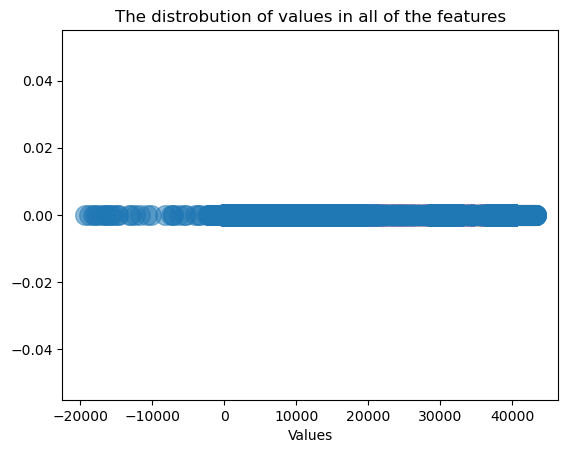

In [18]:
plt.scatter(extracted_train.values.reshape(-1), np.zeros(extracted_train.values.reshape(-1).shape[0]), alpha=0.5, s=200)
plt.title("The distrobution of values in all of the features")
plt.xlabel('Values')
plt.show()

The distrobution is clearly even with a small region of a slightly lower density of points, which means that global standardization using Z-Score Scaling is optimal.

In [37]:
standardized_train = extracted_train.copy()
mean_std = dict()
for col in standardized_train.columns[1:]:
    mean = standardized_train[col].mean()
    std = standardized_train[col].std()
    mean_std[col] = (mean, std)
    standardized_train[col] = (standardized_train[col] - mean) / std

Now let's plot a few normalized, and non normalized features just for the sake of comparison:

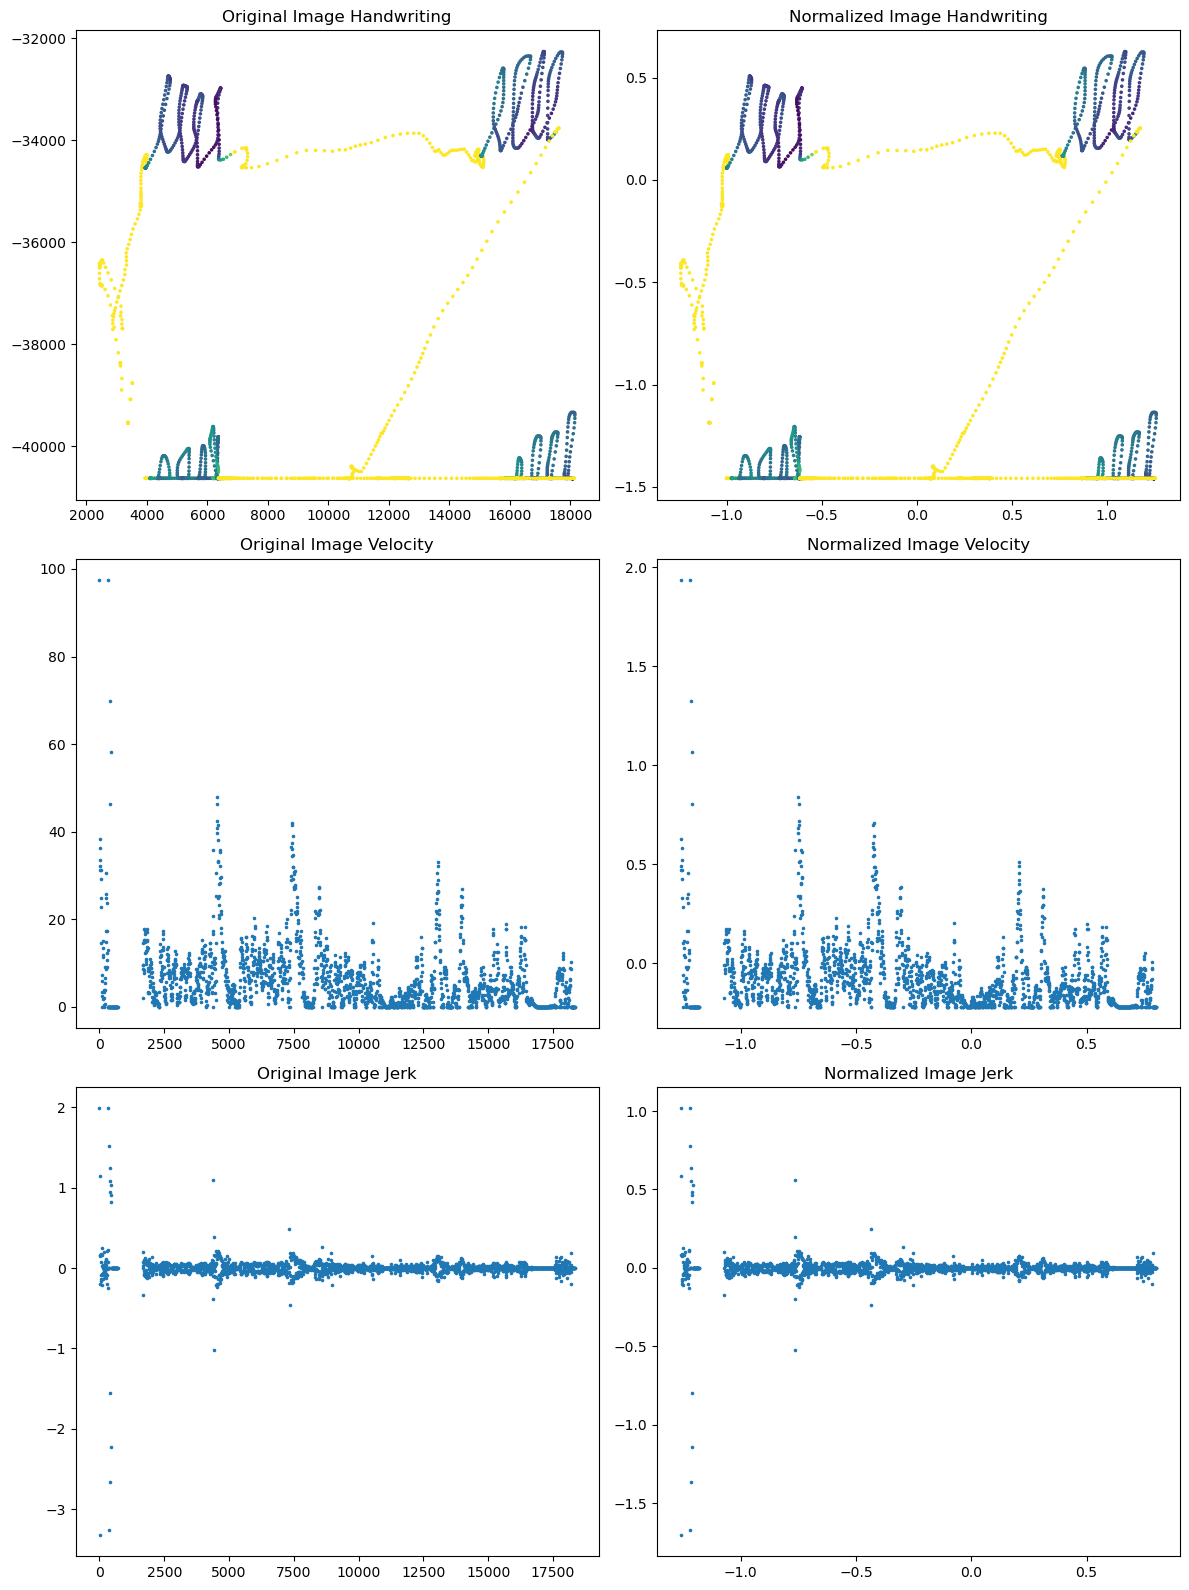

In [38]:
img_ix = standardized_train.index.unique()[np.random.randint(0, high=standardized_train.index.unique().shape[0] - 1)]

plt.close()

fig = plt.figure(figsize=(12, 16))

og_plot1 = plt.subplot2grid((3, 2), (0, 0))
og_plot2 = plt.subplot2grid((3, 2), (1, 0))
og_plot3 = plt.subplot2grid((3, 2), (2, 0))

norm_plot1 = plt.subplot2grid((3, 2), (0, 1))
norm_plot2 = plt.subplot2grid((3, 2), (1, 1))
norm_plot3 = plt.subplot2grid((3, 2), (2, 1))

og_plot1.set_title('Original Image Handwriting')
og_plot1.scatter(extracted_train.loc[img_ix]['X'], extracted_train.loc[img_ix]['Y'] * -1, s=2.5, c=extracted_train.loc[img_ix]['P'] * -1)
og_plot2.set_title('Original Image Velocity')
og_plot2.scatter(extracted_train.loc[img_ix]['Time'], extracted_train.loc[img_ix]['Velocity x-y'], s=2.5)
og_plot3.set_title('Original Image Jerk')
og_plot3.scatter(extracted_train.loc[img_ix]['Time'], extracted_train.loc[img_ix]['Jerk x-y'], s=2.5)


norm_plot1.set_title('Normalized Image Handwriting')
norm_plot1.scatter(standardized_train.loc[img_ix]['X'], standardized_train.loc[img_ix]['Y'] * -1, s=2.5, c=standardized_train.loc[img_ix]['P'] * -1)
norm_plot2.set_title('Normalized Image Velocity')
norm_plot2.scatter(standardized_train.loc[img_ix]['Time'], standardized_train.loc[img_ix]['Velocity x-y'], s=2.5)
norm_plot3.set_title('Normalized Image Jerk')
norm_plot3.scatter(standardized_train.loc[img_ix]['Time'], standardized_train.loc[img_ix]['Jerk x-y'], s=2.5)


plt.tight_layout()
plt.show()

In [39]:
standardized_train

PD      Time         X         Y  \
ID                    Language Task                                     
ALAMI AROUSSI MOHAMED French   3      1 -1.259254 -0.585025 -0.644698   
                               3      1 -1.258355 -0.592978 -0.649433   
                               3      1 -1.257568 -0.601726 -0.653919   
                               3      1 -1.256669 -0.610633 -0.658654   
                               3      1 -1.255882 -0.618585 -0.665383   
...                                  ..       ...       ...       ...   
ZYATE TAOUFIK         French   3      0 -0.142143  1.690396  1.220506   
                               3      0 -0.141244  1.690396  1.220506   
                               3      0 -0.140457  1.690396  1.220506   
                               3      0 -0.139558  1.690396  1.220506   
                               3      0 -0.138772  1.690396  1.220506   

                                            P        Az        Al  \
ID                    Language Task                                 
ALAMI AROUSSI MOHAMED French   3    -1.241437 -1.350816  0.197504   
                               3    -1.241437 -1.323329  0.197504   
                               3    -1.241437 -1.323329  0.124242   
                               3    -1.241437 -1.323329  0.050980   
                               3    -1.241437 -1.323329  0.050980   
...                                       ...       ...       ...   
ZYATE TAOUFIK         French   3    -1.241437 -0.278820  0.637078   
                               3    -1.241437 -0.278820  0.637078   
                               3    -1.241437 -0.278820  0.637078   
                               3    -1.241437 -0.278820  0.637078   
                               3    -1.241437 -0.278820  0.637078   

                                     Displacement x  Displacement y  \
ID                    Language Task                                   
ALAMI AROUSSI MOHAMED French   3          17.524795       45.865859   
                               3          -0.158698       -0.052336   
                               3          -0.172082       -0.050910   
                               3          -0.174759       -0.052336   
                               3          -0.158698       -0.063740   
...                                             ...             ...   
ZYATE TAOUFIK         French   3          -0.024853       -0.025252   
                               3          -0.024853       -0.025252   
                               3          -0.024853       -0.025252   
                               3          -0.024853       -0.025252   
                               3          -0.024853       -0.025252   

                                     Distance x  Distance y  Distance x-y  \
ID                    Language Task                                         
ALAMI AROUSSI MOHAMED French   3      17.551545   45.986331     41.483144   
                               3       0.013472   -0.067290     -0.047663   
                               3       0.026950   -0.068721     -0.042115   
                               3       0.029646   -0.067290     -0.040513   
                               3       0.013472   -0.055839     -0.043439   
...                                         ...         ...           ...   
ZYATE TAOUFIK         French   3      -0.121312   -0.094486     -0.115387   
                               3      -0.121312   -0.094486     -0.115387   
                               3      -0.121312   -0.094486     -0.115387   
                               3      -0.121312   -0.094486     -0.115387   
                               3      -0.121312   -0.094486     -0.115387   

                                     Velocity x  Velocity y  Velocity x-y  \
ID                    Language Task                                         
ALAMI AROUSSI MOHAMED French   3      35.245006    2.469416     29.094797   
                               3

## 4. Model Architecture Design

In [41]:
from datamanipulation.datageneration import get_samples
X, y = get_samples(standardized_train, 'PD')

- I use the Sequential model, which allows you to build a neural network by stacking layers sequentially.
- Two GRU layers with 64 units each are added. The input_shape=(None, 25) specifies that the input can have variable-length sequences (None) with 25 features per time step. We use the 'relu' activation function for the GRU layers.
- A dropout layer with a dropout rate of 0.5 is added to reduce overfitting.
- Finally, a Dense layer with a sigmoid activation function is used for binary classification.
- The model is compiled with binary cross-entropy loss and the Adam optimizer.

In [ ]:
"""
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# defining the gru model
model = Sequential()
model.add(GRU(64, input_shape=(None, 25), activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# summary
model.summary()
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# zero padding
X_padded = pad_sequences(X, dtype='float32', padding='post')

# Create the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(5758, 25), activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])

# Train the model
model.fit(X_padded, y, epochs=15, batch_size=32, verbose=1, validation_data=(X_padded, y))

Epoch 1/15
1/1 [==============================] - 36s 36s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.7057 - val_accuracy: 0.4667
Epoch 2/15
1/1 [==============================] - 40s 40s/step - loss: 0.7097 - accuracy: 0.4667 - val_loss: 0.7057 - val_accuracy: 0.4667
Epoch 3/15
1/1 [==============================] - 32s 32s/step - loss: 0.6892 - accuracy: 0.4667 - val_loss: 0.7057 - val_accuracy: 0.4667
Epoch 4/15
1/1 [==============================] - ETA: 0s - loss: 0.7128 - accuracy: 0.4667

- I perform 5-fold stratified cross-validation.
- Inside the cross-validation loop, we create a new instance of the GRU model for each fold and train it on the training data.
- After training, we evaluate the model's accuracy on the validation set for each fold and store the accuracies in the accuracies list.
- Finally, we calculate and print the average accuracy across all folds.

In [43]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# zero padding
X_padded = pad_sequences(X, dtype='float32', padding='post')

# Initialize KFold cross-validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy for each fold
accuracies = []

# Loop through the folds
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X_padded[train_index], X_padded[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(5758, 25), activation='relu', return_sequences=True))
    model.add(GRU(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    # Evaluate the model on the validation set
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)

Epoch 1/10
1/1 [==============================] - 24s 24s/step - loss: 0.6909 - accuracy: 0.5417 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 26s 26s/step - loss: 0.6924 - accuracy: 0.4583 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 25s 25s/step - loss: 0.6882 - accuracy: 0.5417 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10



KeyboardInterrupt



Index(['Time', 'X', 'Y', 'P', 'Az', 'Al', 'Displacement x', 'Displacement y',
       'Distance x', 'Distance y', 'Distance x-y', 'Velocity x', 'Velocity y',
       'Velocity x-y', 'Acceleration x', 'Acceleration y', 'Acceleration x-y',
       'Jerk x', 'Jerk y', 'Jerk x-y', 'ROC p / time', 'ROC al / time',
       'ROC az / time', 'Slope', 'Slant'],
      dtype='object')